<a href="https://colab.research.google.com/github/anirudhkumar29/db-A-Discontinuity-bounded-Search-for-Kinodynamic-Mobile-Robot-Motion-Planning/blob/main/Lab3_rmp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-7e792ae9483c>:34: RuntimeWarning: divide by zero encountered in divide
  U_rep[mask] = 0.5 * k_rep * (1.0 / distance[mask] - 1.0 / rho_0)**2


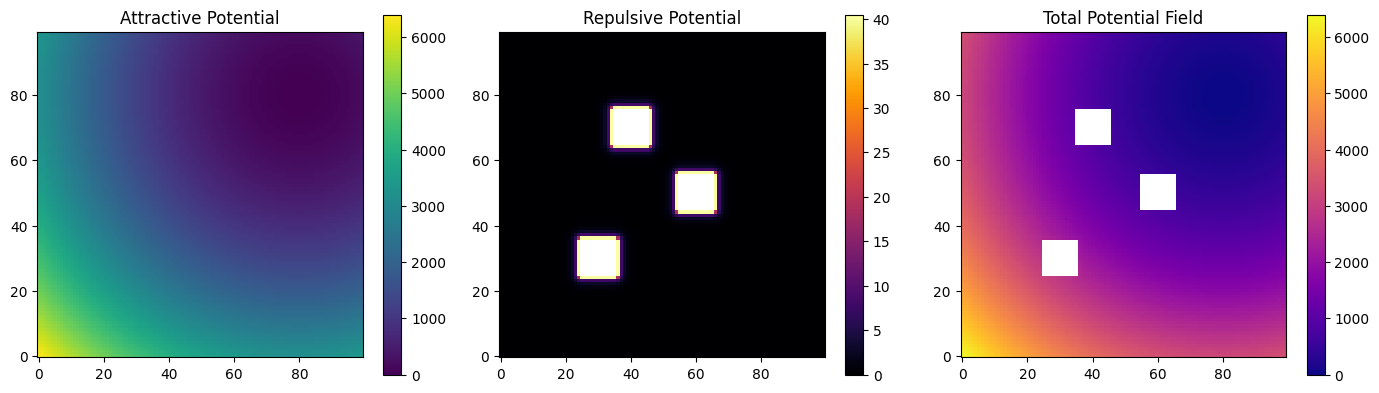

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_edt

# Parameters
grid_size = (100, 100)
goal = np.array([80, 80])
obstacles = [(30, 30), (50, 60), (70, 40)]
obs_radius = 5

k_att = 1.0       # attractive gain
k_rep = 100.0     # repulsive gain
rho_0 = 10        # influence radius for repulsive potential

# Create the environment
env = np.ones(grid_size)
for (x, y) in obstacles:
    for dx in range(-obs_radius, obs_radius+1):
        for dy in range(-obs_radius, obs_radius+1):
            if 0 <= x+dx < grid_size[0] and 0 <= y+dy < grid_size[1]:
                env[x+dx, y+dy] = 0  # obstacle

# Distance transform for repulsive field
obstacle_map = 1 - env
distance = distance_transform_edt(env)

# Attractive Potential
x, y = np.meshgrid(np.arange(grid_size[0]), np.arange(grid_size[1]), indexing='ij')
U_att = 0.5 * k_att * ((x - goal[0])**2 + (y - goal[1])**2)

# Repulsive Potential
U_rep = np.zeros_like(U_att)
mask = distance <= rho_0
U_rep[mask] = 0.5 * k_rep * (1.0 / distance[mask] - 1.0 / rho_0)**2

# Total Potential Field
U_total = U_att + U_rep

# Visualizations
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.title("Attractive Potential")
plt.imshow(U_att, origin='lower', cmap='viridis')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Repulsive Potential")
plt.imshow(U_rep, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Total Potential Field")
plt.imshow(U_total, origin='lower', cmap='plasma')
plt.colorbar()

plt.tight_layout()
plt.show()
